In [20]:
# Set up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Set up
sns.set_style('darkgrid')

In [21]:
# Load datasets
movies_df = pd.read_csv('./wbsflix-dataset/movies.csv')
ratings_df = pd.read_csv('./wbsflix-dataset/ratings.csv')
tags_df = pd.read_csv('./wbsflix-dataset/tags.csv')
links_df = pd.read_csv('./wbsflix-dataset/links.csv')

#### <font color='00ff3b'>Infos</font>

In [22]:
print(f'Movies\n{movies_df.sample(3)}\n\nRatings\n{ratings_df.sample(3)}\n\nTags\n{tags_df.sample(3)}\n\nLinks\n{links_df.sample(3)}')

Movies
      movieId                                           title  \
6997    67508              Baader Meinhof Komplex, Der (2008)   
55         62                       Mr. Holland's Opus (1995)   
2809     3754  Adventures of Rocky and Bullwinkle, The (2000)   

                                           genres  
6997                  Action|Crime|Drama|Thriller  
55                                          Drama  
2809  Adventure|Animation|Children|Comedy|Fantasy  

Ratings
       userId  movieId  rating   timestamp
96062     602      454     3.0   840875647
85962     558     4308     5.0  1035416273
33341     226     4011     4.5  1095663775

Tags
      userId  movieId                tag   timestamp
557      256   126548              funny  1447532592
2389     474     8951           abortion  1138040272
7          2   106782  Leonardo DiCaprio  1445715051

Links
      movieId   imdbId    tmdbId
4635     6918    48956     897.0
2230     2965   203408   29064.0
8073    99574  2091

##### <font color='00ff3b'>Check NaN</font>

In [23]:
print(f'Movies\n{movies_df.isna().sum()}\n\nRatings\n{ratings_df.isna().sum()}\n\nTags\n{tags_df.isna().sum()}\n\nLinks\n{links_df.isna().sum()}')

Movies
movieId    0
title      0
genres     0
dtype: int64

Ratings
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Tags
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Links
movieId    0
imdbId     0
tmdbId     8
dtype: int64


#### <font color='00ff3b'>Basic Analysis</font>

In [24]:
analysis_results = {}

# Number of unique movies, users, and tags
analysis_results['Unique Movies'] = movies_df['movieId'].nunique()
analysis_results['Unique Users'] = ratings_df['userId'].nunique()
analysis_results['Unique Tags'] = tags_df['tag'].nunique()

# Ratings Distribution 
rating_distribution = ratings_df['rating'].value_counts(normalize=True).sort_index()

# Top 5 genres
genre_counts = movies_df['genres'].str.split('|').explode().value_counts().head(5)

analysis_results['Rating Distribution'] = rating_distribution
analysis_results['Top 5 Genres'] = genre_counts

analysis_results

{'Unique Movies': 9742,
 'Unique Users': 610,
 'Unique Tags': 1589,
 'Rating Distribution': rating
 0.5    0.013586
 1.0    0.027877
 1.5    0.017762
 2.0    0.074884
 2.5    0.055040
 3.0    0.198808
 3.5    0.130271
 4.0    0.265957
 4.5    0.084801
 5.0    0.131015
 Name: proportion, dtype: float64,
 'Top 5 Genres': genres
 Drama       4361
 Comedy      3756
 Thriller    1894
 Action      1828
 Romance     1596
 Name: count, dtype: int64}

<font color='00ff3b'> **Movies and Users**: </font>
The dataset contains 9,742 unique movies and 610 unique users, indicating a broad variety of movies and a substantial user base for our analysis.

<font color='00ff3b'>**Tags**: </font>
There are 1,589 unique tags, showcasing a diverse range of user-generated content that can enrich our content-based filtering component.

<font color='00ff3b'>**Rating Distribution**:</font>

The distribution of ratings is skewed towards higher values, with 4.0 being the most common rating, followed by 3.0 and 5.0.

Lower ratings (0.5 to 2.0) are less common, suggesting that users are more likely to rate movies they enjoyed.

<font color='00ff3b'>**Top 5 Genres**</font>: The most common genres are Drama, Comedy, Thriller, Action, and Romance. This diversity in genres provides a good foundation for recommending movies based on genre similarities.

#### <font color='#ac6af7'>Extract the year from the movie titles</font>

In [25]:
movies_df.sample(10)

,movieId,title,genres
8833,131920,The Road Within (2014),Comedy|Drama
3390,4613,K-9 (1989),Action|Comedy|Crime
3047,4081,Back to the Beach (1987),Comedy
5597,26913,Street Fighter II: The Animated Movie (Sutorît...,Action|Animation
1608,2150,"Gods Must Be Crazy, The (1980)",Adventure|Comedy
8821,131237,What Men Talk About (2010),Comedy
7813,92507,Safe House (2012),Action|Crime|Mystery|Thriller
5883,33162,Kingdom of Heaven (2005),Action|Drama|Romance|War
4892,7326,"Reckoning, The (2004)",Crime|Drama
3360,4564,Always (1989),Drama|Fantasy|Romance


In [26]:
movies_df['year'] = movies_df['title'].str.extract('.*\((\d{4})\).*', expand=False)
movies_df['title'] = movies_df['title'].str.replace(r'\(\d{4}\)', '', regex=True)

In [27]:
movies_df

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018


In [28]:
genre_counts = movies_df['genres'].str.split('|').explode().value_counts()
genre_counts 

genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64

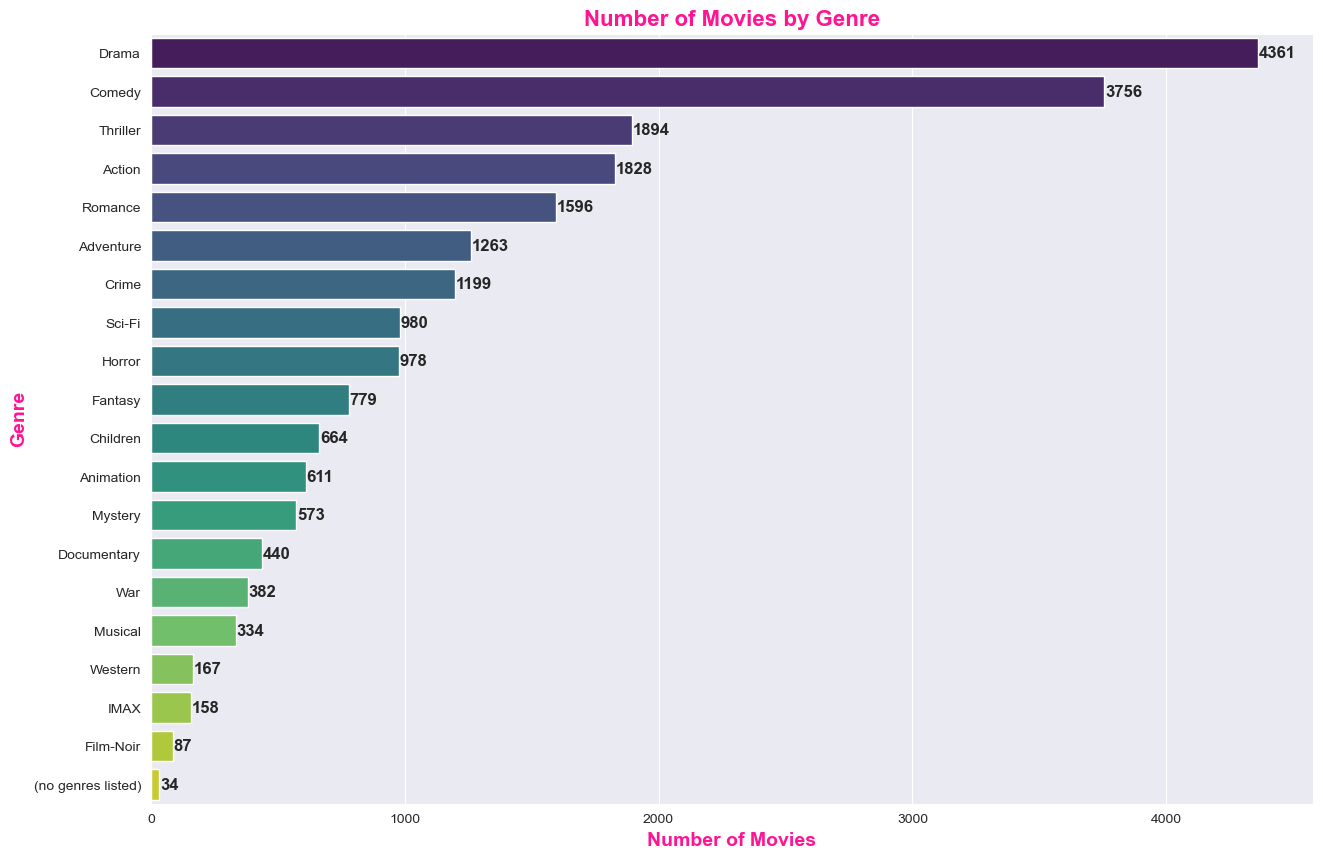

In [29]:
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x="Count", y="Genre", data=genre_counts_df, palette="viridis")

plt.title('Number of Movies by Genre', fontsize=16,color='deeppink', fontweight='bold')
plt.xlabel('Number of Movies', fontsize=14,color='deeppink', fontweight='bold')
plt.ylabel('Genre', fontsize=14,color='deeppink', fontweight='bold')

for p in bar_plot.patches:
    width = p.get_width()    
    plt.text(x=width + 3,    
             y=p.get_y() + p.get_height() / 2, 
             s=f'{int(width)}',    
             va='center',    
             ha='left',      
             fontsize=12,    
             fontweight='bold')

plt.show()



#### <font color='#00d8ff'>Movie's Ratings Distribution</font>

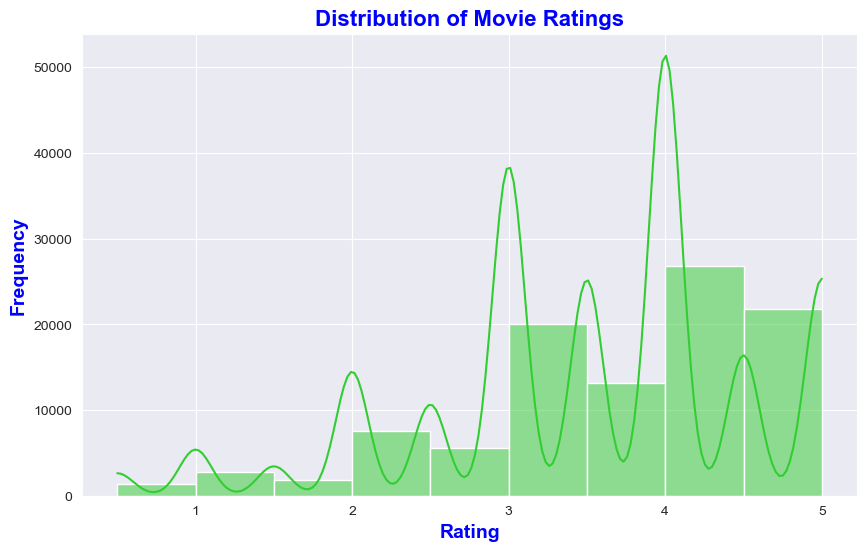

In [30]:
plt.figure(figsize=(10, 6))

# Plotting Ratings Distribution
sns.histplot(data=ratings_df, x='rating', bins=9, color='limegreen', kde=True)

# Title and labels
plt.title('Distribution of Movie Ratings', fontsize=16, color='blue', fontweight='bold')
plt.xlabel('Rating', fontsize=14, color='blue', fontweight='bold')
plt.ylabel('Frequency', fontsize=14, color='blue', fontweight='bold')

plt.show()


#### <font color='#00d8ff'>Average Rating per Movie</font>

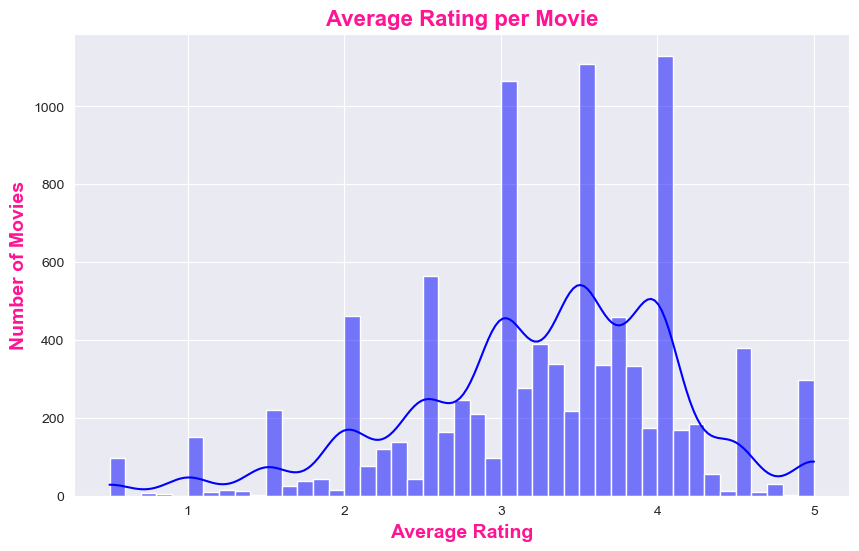

In [31]:
average_rating_per_movie = ratings_df.groupby('movieId')['rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(average_rating_per_movie, bins=45, color='blue', kde=True)
plt.title('Average Rating per Movie',fontsize=16, color='deeppink', fontweight='bold')
plt.xlabel('Average Rating',fontsize=14, color='deeppink', fontweight='bold')
plt.ylabel('Number of Movies',fontsize=14, color='deeppink', fontweight='bold')
plt.show()

#### <font color='#00d8ff'>Average Rating per User</font>

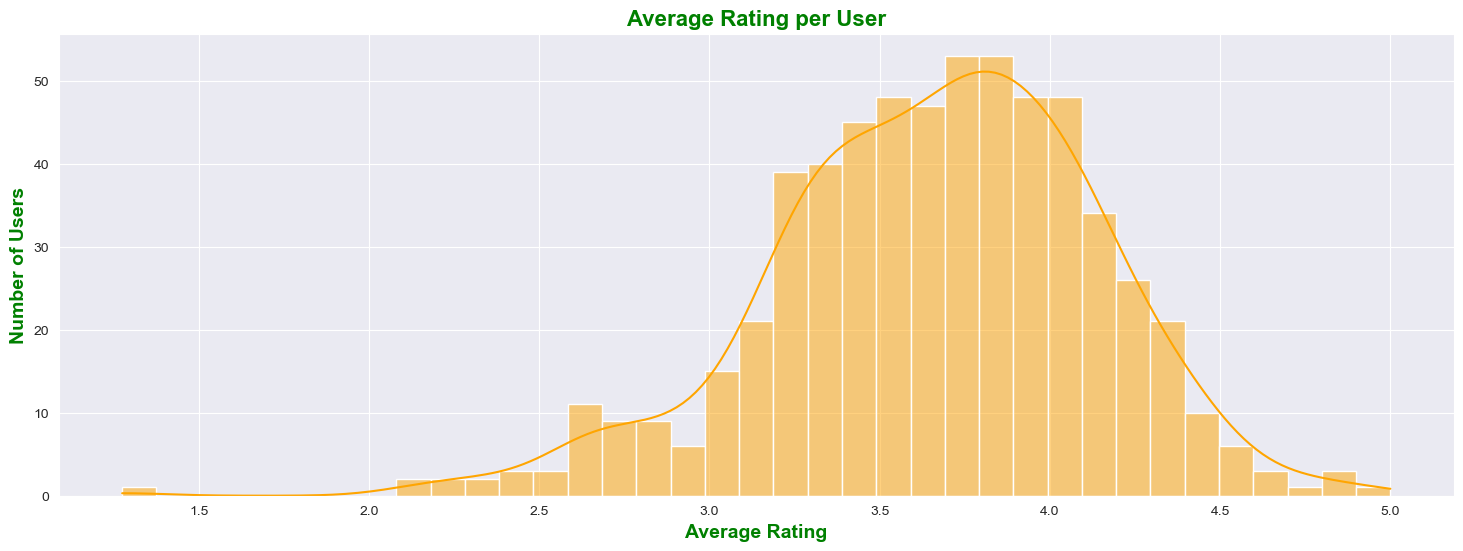

In [32]:
average_rating_per_user = ratings_df.groupby('userId')['rating'].mean()

plt.figure(figsize=(18, 6))
sns.histplot(average_rating_per_user, bins=37, color='orange', kde=True)
plt.title('Average Rating per User', fontsize=16, color='green', fontweight='bold')
plt.xlabel('Average Rating',fontsize=14, color='green', fontweight='bold')
plt.ylabel('Number of Users',fontsize=14, color='green', fontweight='bold')
plt.show()


#### <font color='#00d8ff'>Average Rating per genre</font>

In [33]:
# Make a copy
movies_genres = movies_df.copy()

# Split genres 
movies_genres['genres'] = movies_genres['genres'].str.split('|')
movies_genres = movies_genres.explode('genres')

movies_genres


,movieId,title,genres,year
0,1,Toy Story,Adventure,1995
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children,1995
0,1,Toy Story,Comedy,1995
0,1,Toy Story,Fantasy,1995
...,...,...,...,...
9738,193583,No Game No Life: Zero,Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action,2018
9740,193587,Bungo Stray Dogs: Dead Apple,Animation,2018


In [34]:
# Calculate the average rating for each movie
average_rating_per_movie = ratings_df.groupby('movieId')['rating'].mean().reset_index()
average_rating_per_movie.columns = ['movieId', 'averageRating']

# Merge the average ratings 
rated_movies = pd.merge(movies_genres, average_rating_per_movie, on='movieId', how='left', validate='many_to_one')

rated_movies.sample(10)


,movieId,title,genres,year,averageRating
17711,91542,Sherlock Holmes: A Game of Shadows,Crime,2011,3.763158
1942,1180,Hear My Song,Comedy,1991,3.000000
17902,93740,Salmon Fishing in the Yemen,Comedy,2011,1.500000
13960,47538,Crime Busters,Adventure,1977,2.500000
19866,122490,Wicked Blood,Drama,2014,1.500000
21308,162344,Tom Segura: Mostly Stories,Comedy,2016,5.000000
4428,2657,"Rocky Horror Picture Show, The",Sci-Fi,1975,3.341270
21874,179819,Star Wars: The Last Jedi,Fantasy,2017,3.125000
8958,5979,Attack of the Crab Monsters,Sci-Fi,1957,3.000000
10878,7812,Babylon 5: Thirdspace,Drama,1998,3.666667


In [35]:
# Calculate the average rating for each genre
average_rating_per_genre = rated_movies.groupby('genres')['averageRating'].mean().reset_index()

# Sort the genres by average rating for better visualization
average_rating_per_genre_sorted = average_rating_per_genre.sort_values('averageRating', ascending=False)

# Display the sorted average ratings per genre
average_rating_per_genre_sorted


,genres,averageRating
7,Documentary,3.781682
10,Film-Noir,3.670471
18,War,3.571655
3,Animation,3.497119
8,Drama,3.420905
19,Western,3.383389
0,(no genres listed),3.371148
15,Romance,3.364870
14,Mystery,3.330364
12,IMAX,3.311996


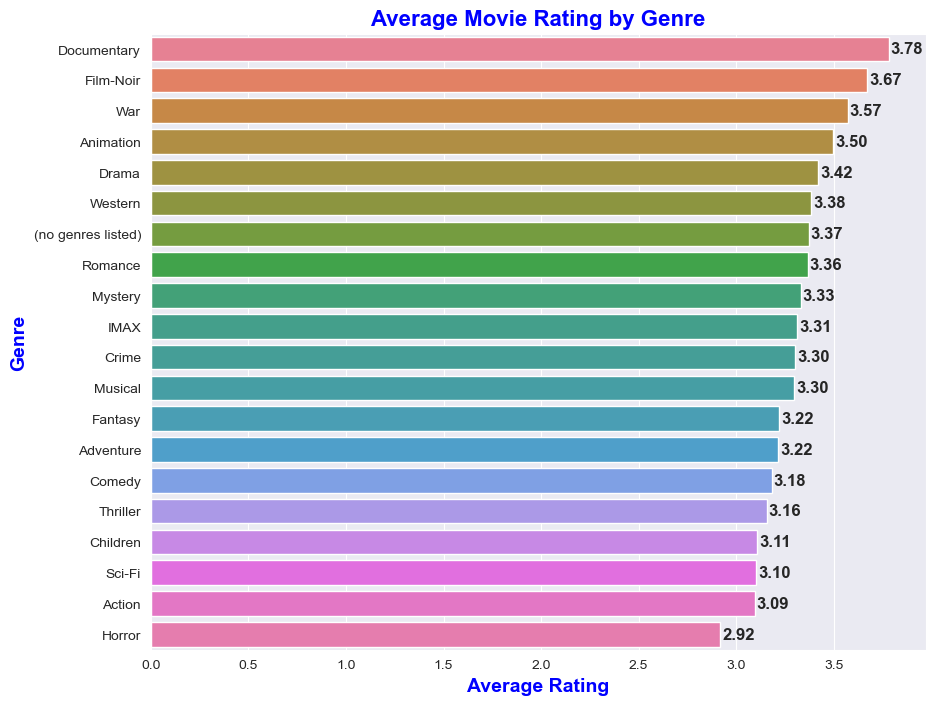

In [36]:
plt.figure(figsize=(10, 8))

bar_plot = sns.barplot(data=average_rating_per_genre_sorted, x='averageRating', y='genres', palette='husl')

plt.title('Average Movie Rating by Genre',fontsize=16, color='blue', fontweight='bold')
plt.xlabel('Average Rating',fontsize=14, color='blue', fontweight='bold')
plt.ylabel('Genre',fontsize=14, color='blue', fontweight='bold')

for p in bar_plot.patches:
    width = p.get_width()    
    plt.text(x=width + 0.01,    
             y=p.get_y() + p.get_height() / 2, 
             s=f'{width:.2f}',    
             va='center',    
             ha='left',      
             fontsize=12,    
             fontweight='bold')
             
plt.show()


#### <font color='#00d8ff'>Count Movies Released Each Year</font>

In [37]:
movies_per_year = movies_df.groupby('year').size()

movies_per_year_df = movies_per_year.reset_index(name='count')

movies_per_year_df.sample(10)


,year,count
91,2004,279
82,1995,259
36,1949,25
95,2008,269
40,1953,30
11,1924,5
55,1968,42
46,1959,37
70,1983,83
21,1934,11


#### <font color='limegreen'>Overtime Movies Trend</font>

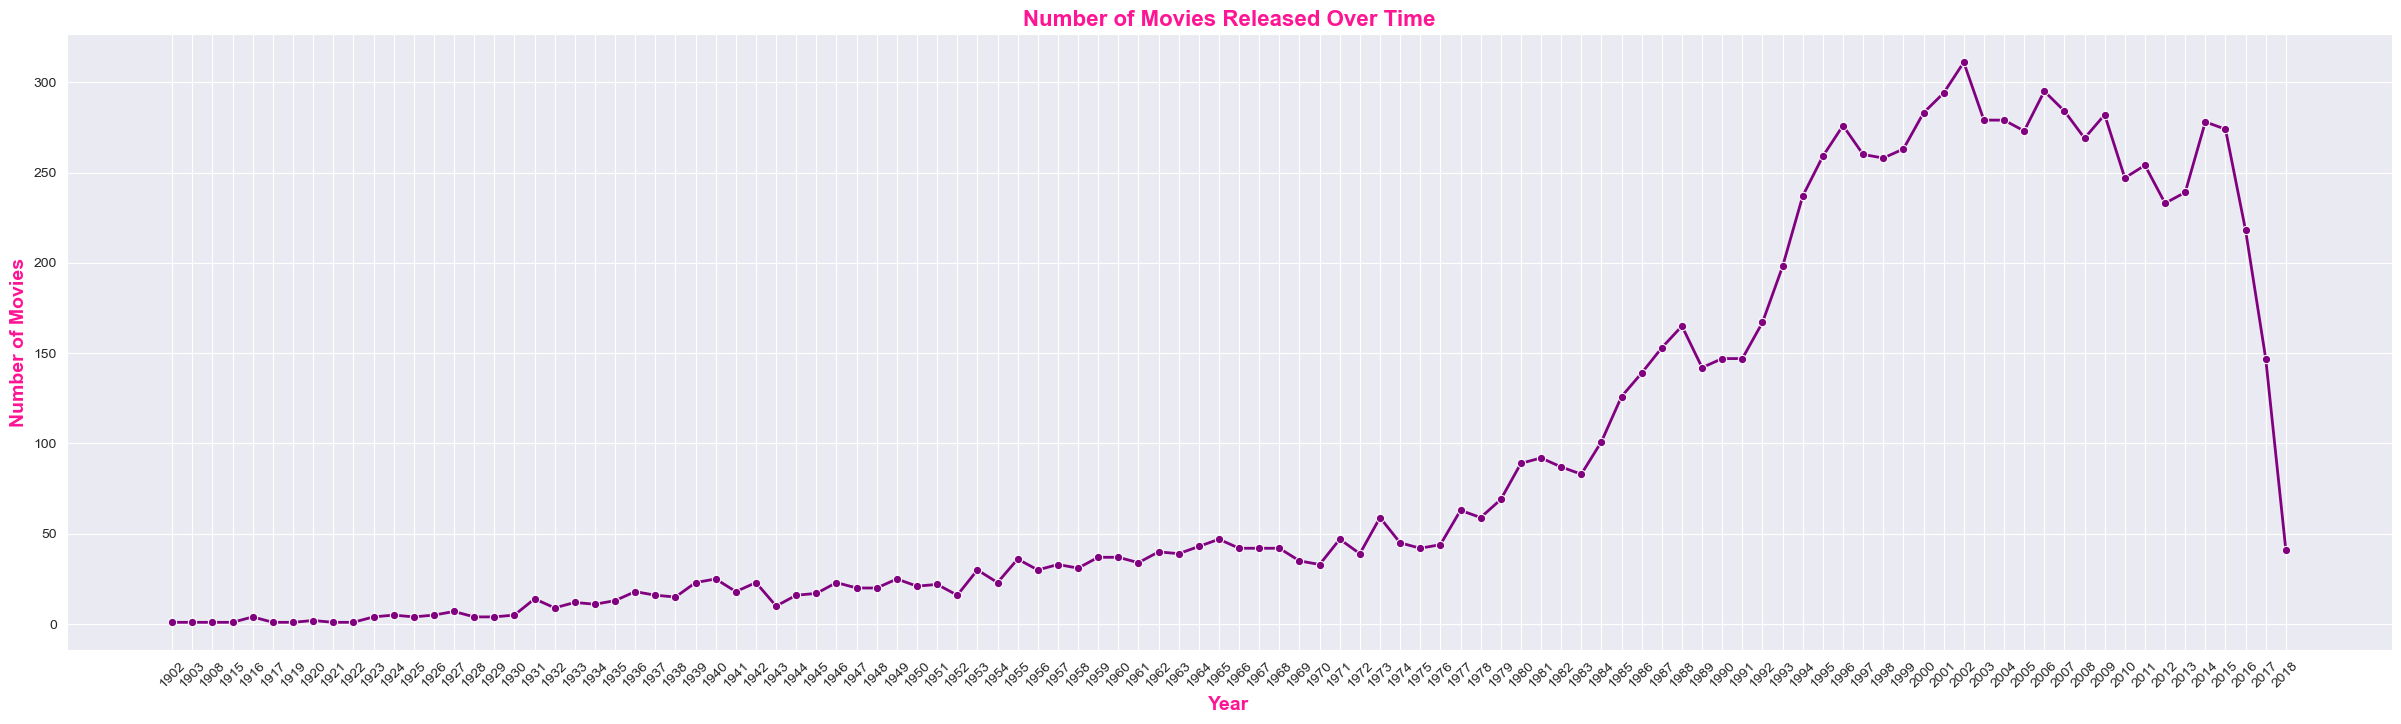

In [40]:
plt.figure(figsize=(30, 8))

# Plotting the trend of movies released over the years
sns.lineplot(data=movies_per_year_df, x='year', y='count', marker='o', color='purple', lw=2)

# Adding plot title and labels
plt.title('Number of Movies Released Over Time', fontsize=16,color='deeppink', fontweight='bold')
plt.xlabel('Year', fontsize=14,color='deeppink', fontweight='bold')
plt.ylabel('Number of Movies', fontsize=14,color='deeppink', fontweight='bold')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap

# Show plot
plt.show()


#### <font color='cyan'>Count Movies by Genre per Year</font>

In [46]:
# Count movies by genre per year
movies_by_genre_year = movies_genres.groupby(['year', 'genres']).size().reset_index(name='count')

# Make years the index, genres the columns, and counts the values
movies_by_genre_year_df = movies_by_genre_year.pivot(index='year', columns='genres', values='count').fillna(0).astype(int)

movies_by_genre_year_df.sample(5)


genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1959,0,3,5,1,4,7,3,0,15,1,0,7,0,2,2,6,7,2,8,2
2009,0,59,37,32,17,111,39,12,131,32,1,41,10,7,24,41,44,72,7,2
2006,0,49,38,26,22,118,35,23,146,38,1,33,7,6,25,54,25,76,10,1
1945,0,0,0,1,1,2,3,0,7,1,2,4,0,2,6,2,0,3,3,0
1963,0,5,9,1,3,15,6,0,15,3,1,6,0,1,2,3,4,7,4,1


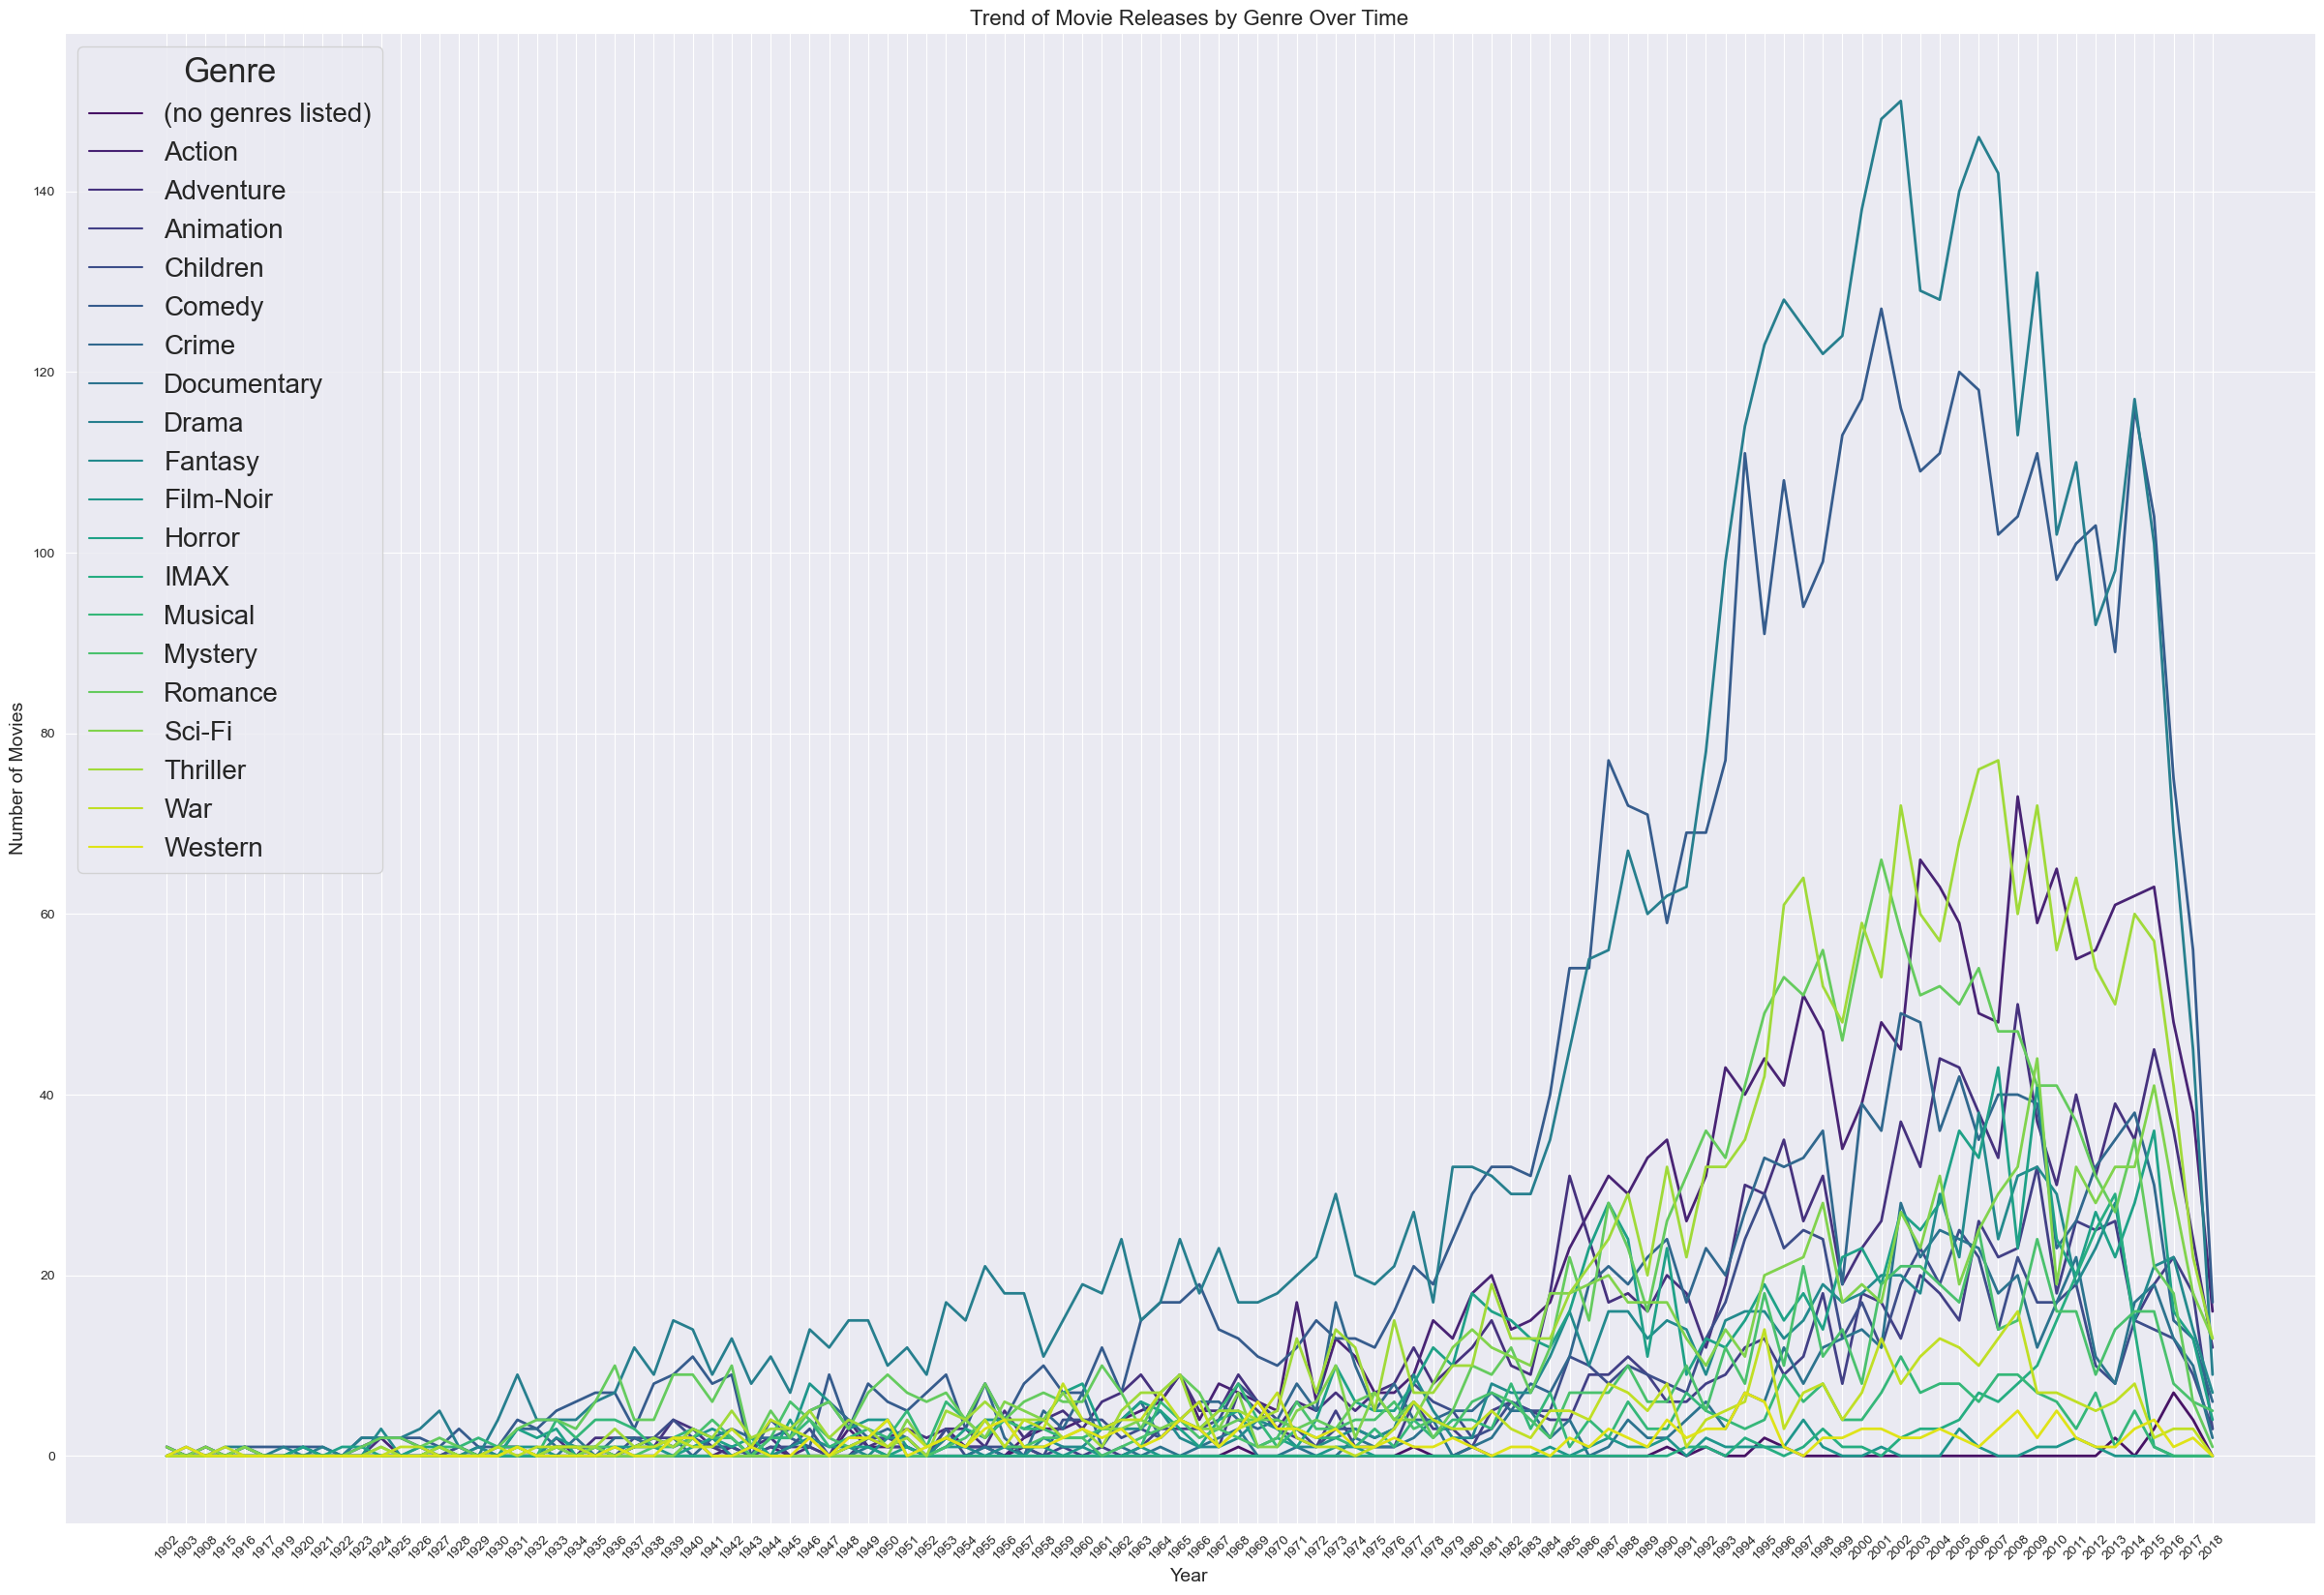

In [52]:
plt.figure(figsize=(30, 20))

# Plotting the trends of movie releases per genre over the years
sns.lineplot(data=movies_by_genre_year_df, dashes=False, palette='viridis', lw=2)

# Adding plot title and labels
plt.title('Trend of Movie Releases by Genre Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap
plt.legend(title='Genre', title_fontsize='25', fontsize='20', loc='upper left')

# Show plot
plt.show()


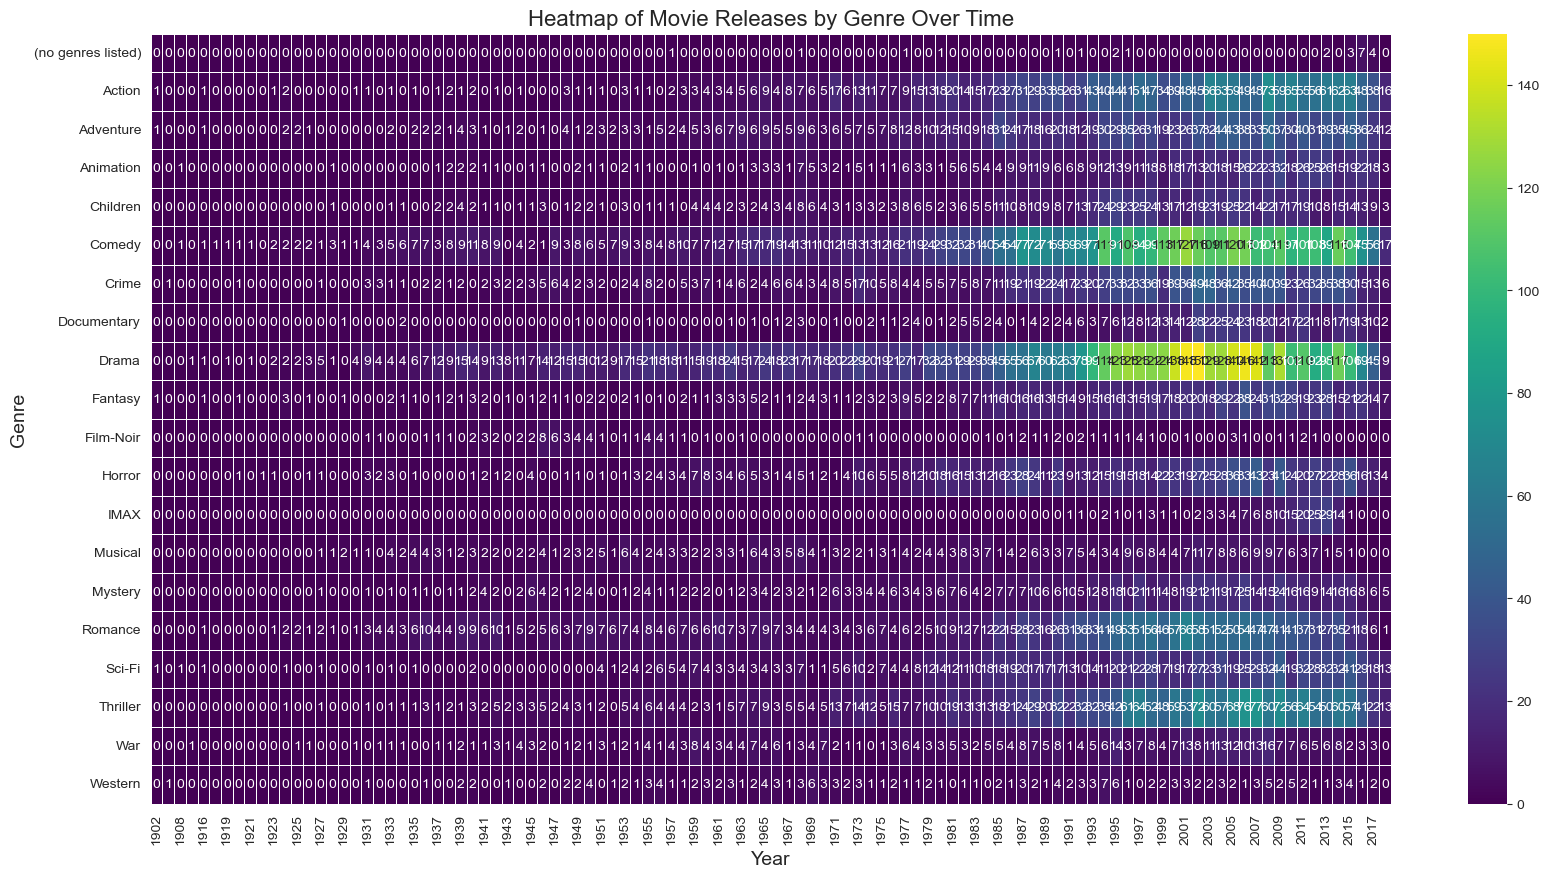

In [54]:
plt.figure(figsize=(20, 10))
sns.heatmap(movies_by_genre_year_df.T, cmap='viridis', linewidths=.5, annot=True, fmt="d")
plt.title('Heatmap of Movie Releases by Genre Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()


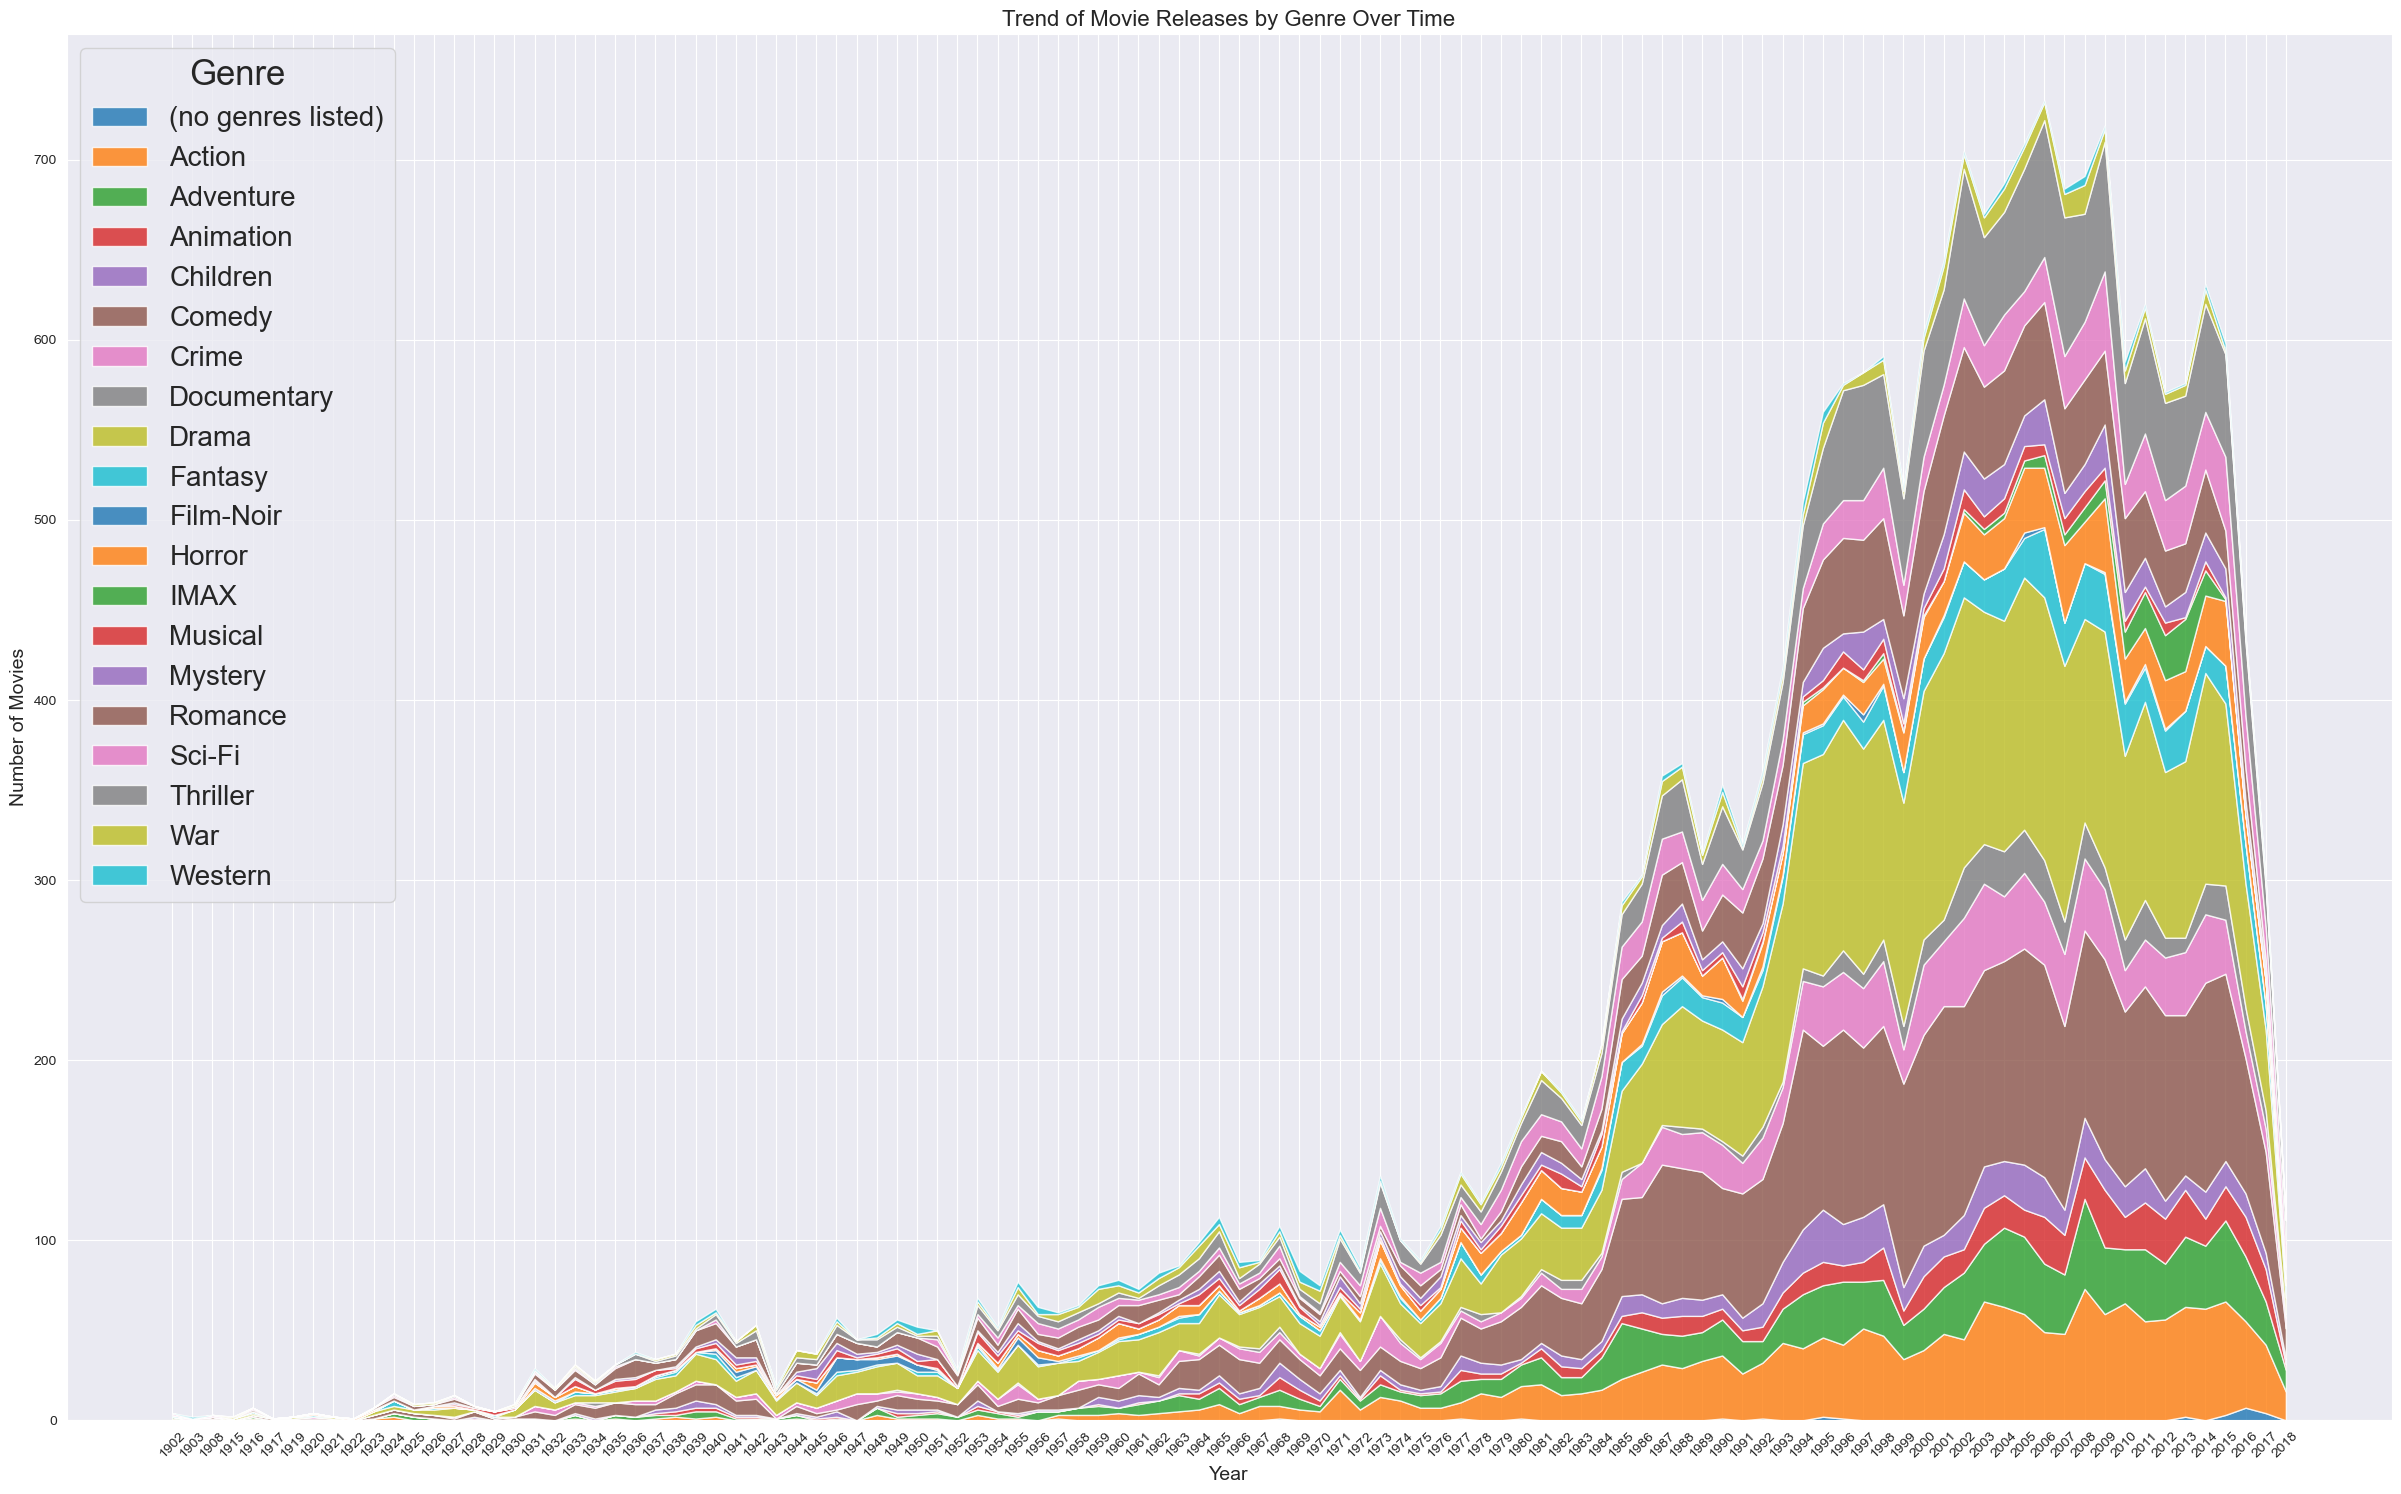

In [57]:
plt.figure(figsize=(30, 18))
plt.stackplot(movies_by_genre_year_df.index, movies_by_genre_year_df.T, labels=movies_by_genre_year_df.columns, alpha=0.8)

plt.title('Trend of Movie Releases by Genre Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.legend(title='Genre', title_fontsize='25', fontsize='20', loc='upper left')
plt.xticks(rotation=45)
plt.show()

#### <font color='#00d8ff'>Count Movies Released Each Year</font>